# Opmap analysis

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import copy
import cv2
import math
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [17]:
import sys
sys.path.append("./opmap/opmap")

In [18]:
from RawCam import RawCam
from VmemMap import VmemMap
from util import makeMovie

## parameters

In [19]:
exp_dir = "/mnt/recordings/ExperimentData/"
anl_dir = "/mnt/recordings/AnalysisResult/Tomii/2017-11-23/"

df_path = "./list.csv"

delay = 5

pv_thre = 0.7

## load data frame

In [20]:
df = pd.read_csv(df_path)
print "N:",len(df)
#df

N: 37


In [21]:
i = 10

In [22]:
s = df.loc[i,:]

sample = s["sample"]
session = s["session"]
target = "{0}/{1}/C001H001S{2:0>4}".format(exp_dir, sample, session)    
save_dir = target.replace(exp_dir, anl_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

print "{0}:{1}".format(i, target)


10:/mnt/recordings/ExperimentData//20161019-2/C001H001S0010


In [23]:
cam_stim = RawCam(
    path = target,
    cam_type = 'sa4', 
    image_height = 512, image_width = 512, 
    frame_start = 0, frame_end = 500 )
vmem_stim = VmemMap( cam_stim )

In [37]:
cam_pacing = RawCam(
    path = target.replace('C001H001S0010', 'OOT/C001H001S0002'),
    cam_type = 'sa4', 
    image_height = 512, image_width = 512, 
    frame_start = 0, frame_end = -1 )
vmem_pacing = VmemMap( cam_pacing )

In [25]:
px = 200
py = 456
points = [(px, py)]

In [38]:
vmem_ = copy.deepcopy(vmem_pacing)
vmem_.setDiffRange(diff_min=64)
vmem_.morphROI(closing=12)
vmem_.morphROI(erosion=6)
vmem_.smooth(9)

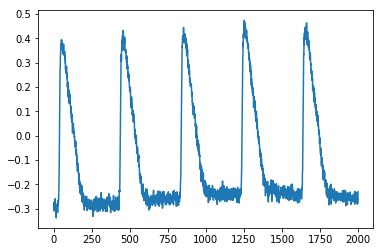

In [39]:
ts = vmem_.data[:, py, px]
plt.plot(ts)

In [28]:
vmem_ = copy.deepcopy(vmem_stim)
vmem_.setDiffRange(diff_min=64)
vmem_.morphROI(closing=12)
vmem_.morphROI(erosion=6)
vmem_.smooth(9)

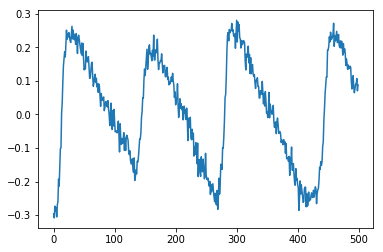

In [29]:
ts_stim = vmem_.data[:, py, px]
plt.plot(ts_stim)

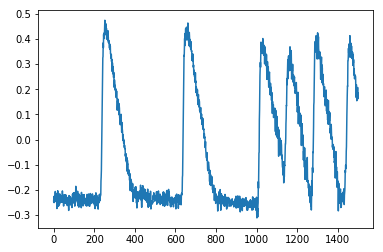

In [44]:
ts_all = np.concatenate([ts, ts_stim[0] + (ts_stim - ts_stim[0])*1.25])[-1500:]
plt.plot(ts_all)